---
title: Circular Convolution Using Discrete Fourier Transform
date: 2023-03-01
---

In this article, I show the mechanics of the discrete Fourier transform (DFT) and circular convolution (within the context of time series analysis). The goal of this post is to present these two methods in a practical yet non-superficial way. We will only deal with real, finite length time series {{< math >}}$\left\{a_t\right\}${{< /math >}}. The primary reference for this article is "Wavelet Methods for Time Series Analysis" by Percival and Walden.

# Discrete Fourier Transform (DFT)

The discrete Fourier transform takes a time series from the time domain to the frequency domain. The transform allows us to see the frequency content of a time series.

Suppose we are given a time series

{{< math >}}
$$
\left\{a_t\right\}=\left\{a_t: t=0, \ldots, N-1\right\}
$$
{{< /math >}}

Its discrete Fourier transform is the complex sequence {{< math >}}$\left\{A_k\right\}${{< /math >}} given by:

{{< math >}}
$$
A_k \equiv \sum_{t=0}^{N-1} a_t e^{-i 2 \pi t k / N}, \quad k=0, \ldots, N-1
$$
{{< /math >}}

Note that {{< math >}}$A_k${{< /math >}} is associated with frequency {{< math >}}$f_k \equiv k / N${{< /math >}}.

In [4]:
import numpy as np
from matplotlib import pyplot as plt

def naive_finite_fourier_transform(a):
    # a can be a list or 1D numpy array
    N = len(a)
    A = []

    for k in range(N):

        A_k = 0

        for t in range(N):
            A_k += a[t] * np.exp((-1j * 2 * np.pi * t * k)/N)
        
        A.append(A_k)

    A = np.asarray(A)

    f = [k/N for k in range(N)]
    f = np.asarray(f)

    return A, f

We can reconstruct {{< math >}}$\left\{a_t\right\}${{< /math >}} from its DFT {{< math >}}$\left\{A_k\right\}${{< /math >}} using the inverse DFT:

{{< math >}}
$$
\frac{1}{N} \sum_{k=0}^{N-1} A_k e^{i 2 \pi t k / N}=a_t, \quad t=0, \ldots, N-1
$$
{{< /math >}}

In [5]:
def naive_inverse_finite_fourier_transform(A):
    # a can be a list or 1D numpy array
    N = len(A)
    a = []

    for t in range(N):

        a_t = 0

        for k in range(N):
            a_t += A[k] * np.exp((1j * 2 * np.pi * t * k)/N)
        
        a.append((1/N)*a_t)

    a = np.asarray(a)

    t = list(range(N))
    t = np.asarray(t)

    return np.real(a), t

## Example

In [6]:
a = np.random.random(100)

In [7]:
A, f = naive_finite_fourier_transform(a)

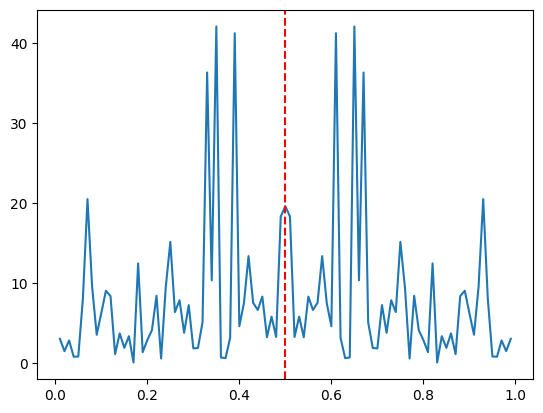

In [8]:
plt.plot(f[1:], np.abs(A[1:])**2)
plt.axvline(x=0.5, color="red", linestyle = "--")
plt.show()

In [9]:
a1, _ = naive_inverse_finite_fourier_transform(A)

In [10]:
np.allclose(a, a1)

True

# Circular Convolution/Filtering

Circular convolution (also called circular filtering) is a simple idea, but is cumbersome to read when described with math. For this reason, I will first show how circular convolution works using pictures before presenting any mathematics.

Suppose we have two time series, {{< math >}}$\{a_t\}${{< /math >}} and {{< math >}}$\{b_t\}${{< /math >}}, both of length {{< math >}}$N=10${{< /math >}}. I won't specify the value of the time series here (I'll leave them to the reader's imagination). I will only show the time indices of each time series in the pictures below. The indices of the first time series {{< math >}}$\{a_t\}${{< /math >}} will be shown in red as follows:

![Time series](a_t.png)

and the indices of the second series {{< math >}}$\{b_t\}${{< /math >}} will be shown in black to distinguish it from {{< math >}}$\{a_t\}${{< /math >}}:

![](b_t.png)

The first step is to reverse the order of {{< math >}}$\{a_t\}${{< /math >}}, which makes its indices look as follows:

![Time series reversed](a_t_reversed.png)

Next, we concatenate {{< math >}}$\{b_t\}${{< /math >}} front to back and perform a sequence of sliding dot products between {{< math >}}$\{a_t\}${{< /math >}} and the newly lengthened version of {{< math >}}$\{b_t\}${{< /math >}} as follows:

![](conv1.png)

The above picture shows how the first element of the result of a circular convolution between {{< math >}}$\{a_t\}${{< /math >}} and {{< math >}}$\{b_t\}${{< /math >}} is constructed:

The next element can be constructed as follows:

![](conv2.png)

and here's element {{< math >}}$N-2${{< /math >}} of the resultant circular convolution time series:

![](conv3.png)

In general, the result of a convolution between two time series (both of length {{< math >}}$N${{< /math >}}) is a resultant time series also of length {{< math >}}$N${{< /math >}}.

Mathematically, the {{< math >}}$t^{th}${{< /math >}} element of the resultant time series from a circular convolution between two time series {{< math >}}$\{a_t\}${{< /math >}} and {{< math >}}$\{b_t\}${{< /math >}} (both of length {{< math >}}$N${{< /math >}}) is:

{{< math >}}
$$
a * b_t \equiv \sum_{u=0}^{N-1} a_u b_{t-u}
$$
{{< /math >}}

where {{< math >}}$t = 0, 1, \dots, N-1${{< /math >}}.

Whenever the subscript on {{< math >}}$b${{< /math >}} is negative (which occurs whenever {{< math >}}$u${{< /math >}} is greater than {{< math >}}$t${{< /math >}}), we define {{< math >}}$b_{-1}=b_{N-1} ; b_{-2}=b_{N-2}${{< /math >}} and so on.

More compactly (at the expense of readability), we can also write the {{< math >}}$t^{th}${{< /math >}} element of the resultant time series of a circular convolution between two time series {{< math >}}$\{a_t\}${{< /math >}} and {{< math >}}$\{b_t\}${{< /math >}} as:

{{< math >}}
$$
a * b_t \equiv \sum_{u=0}^{N-1} a_u b_{(t-u) \bmod N}, \quad t=0, \ldots, N-1
$$
{{< /math >}}

where {{< math >}}$\bmod${{< /math >}} is the modulo operator.

Here's a coded implementation:

In [23]:
def naive_circular_convolution(a, b):
    assert len(a) == len(b)

    N = len(a)
    c = []
    for t in range(N):
        c_t = 0
        for u in range(N):
            c_t += a[u]*b[(t-u) % N]
        c.append(c_t)
    return np.asarray(c)

## Circular Convolution Using DFT

A key fact is that a circular convolution can be computed using the DFT and inverse DFT. Here's how:

1. Compute the DFT of {{< math >}}$\{a_t\}${{< /math >}}, denoted by {{< math >}}$\{A_k\}${{< /math >}}
2. Compute the DFT of {{< math >}}$\{b_t\}${{< /math >}}, denoted by {{< math >}}$\{B_k\}${{< /math >}}
3. Take the inverse DFT of {{< math >}}$\{A_{k} B_{k}\}${{< /math >}}

In [26]:
def naive_circular_convolution_dft(a, b):

    A, _ = naive_finite_fourier_transform(a) # STEP 1
    B, _ = naive_finite_fourier_transform(b) # STEP 2

    # STEP 3
    C = A*B
    c, _ = naive_inverse_finite_fourier_transform(C)
    
    return c

## Example

In [27]:
a = np.random.random(100)
b = np.random.random(100)

In [28]:
c = naive_circular_convolution(a, b)
c1 = naive_circular_convolution_dft(a, b)
np.allclose(c, c1)

True

# Final Words

An interesting point to mention is that circular convolution can be performed using a filter {{< math >}}$\{a_t\}${{< /math >}} that is infinite in length (while the time series {{< math >}}$\{b_t\}${{< /math >}} is finite in length). This is made possible by a process known as "filter periodization". I will make a post in the future about this interesting topic.

Thanks for reading!